In [3]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")

In [5]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["VGT", "SPY"]
# Set timefram to '1D" for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG from Alpacas get_barset function end today variable to get current close prices
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
# Drop the time component of the date
portfolio.index=portfolio.index.date
# Preview data
portfolio.head()

SPY                                          VGT          \
              open      high     low   close     volume    open    high   
2021-10-01  430.98  436.0329  427.24  434.19  110774792  403.14  408.03   

                                    
               low   close  volume  
2021-10-01  398.68  407.05  559079

In [6]:
# Set start and end dates of three years back from today.
start_date = pd.Timestamp('2018-10-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-11', tz='America/New_York').isoformat()

In [7]:
# Get 3 years' worth of historical data for SPY and VGT
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["VGT", "SPY"]
stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Set timefram to '1D" for Alpaca API
timeframe = "1D"
stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000).df
# Drop the time component of the date
stock_data.index=stock_data.index.date
# Display sample data
stock_data.tail()

SPY                                         VGT          \
              open      high     low   close    volume    open    high   
2021-10-05  430.24  435.4900  429.39  433.05  82381830  398.28  405.00   
2021-10-06  429.27  435.1199  427.54  434.92  99477866  398.57  405.87   
2021-10-07  438.39  441.6800  438.20  438.64  64139858  409.42  413.10   
2021-10-08  439.48  439.8900  437.19  437.82  57510090  411.62  411.62   
2021-10-11  437.16  440.2600  434.62  434.67  54993389  406.01  411.12   

                                       
                 low   close   volume  
2021-10-05  397.9400  402.64   451395  
2021-10-06  397.2200  405.50  1006732  
2021-10-07  408.9400  409.98   521141  
2021-10-08  407.4757  407.94   230775  
2021-10-11  405.5000  405.63   239761

In [8]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns
MC_20_years = MCSimulation(
    portfolio_data = stock_data, weights = [.50,.50],
    num_simulation = 500, 
    num_trading_days = 252*20
)

In [9]:
MC_20_years.portfolio_data.tail()


SPY                                                      VGT  \
              open      high     low   close    volume daily_return    open   
2021-10-05  430.24  435.4900  429.39  433.05  82381830     0.010171  398.28   
2021-10-06  429.27  435.1199  427.54  434.92  99477866     0.004318  398.57   
2021-10-07  438.39  441.6800  438.20  438.64  64139858     0.008553  409.42   
2021-10-08  439.48  439.8900  437.19  437.82  57510090    -0.001869  411.62   
2021-10-11  437.16  440.2600  434.62  434.67  54993389    -0.007195  406.01   

                                                            
              high       low   close   volume daily_return  
2021-10-05  405.00  397.9400  402.64   451395     0.014104  
2021-10-06  405.87  397.2200  405.50  1006732     0.007103  
2021-10-07  413.10  408.9400  409.98   521141     0.011048  
2021-10-08  411.62  407.4757  407.94   230775    -0.004976  
2021-10-11  411.12  405.5000  405.63   239761    -0.005663

In [10]:
# Running a Monte Carlo simulation to forecast 20 years cumulative returns
MC_20_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1          2          3          4          5    \
0       1.000000    1.000000   1.000000   1.000000   1.000000   1.000000   
1       1.024081    1.001814   0.997321   0.972997   0.999504   0.999630   
2       1.011335    0.995149   0.987986   0.959152   1.011201   0.996902   
3       0.998459    1.016594   0.983254   0.959959   1.019838   0.994866   
4       0.977966    1.010201   0.980458   0.933839   1.026509   0.990243   
...          ...         ...        ...        ...        ...        ...   
5036  110.606557  523.137983  95.199729  62.179136  33.475211  77.606597   
5037  111.236115  515.780366  94.521588  62.303067  33.855809  77.349856   
5038  109.643620  522.127726  93.196312  62.021973  34.325726  77.623437   
5039  110.384091  522.242273  93.710596  62.289364  34.058480  76.757036   
5040  109.458004  526.897613  92.930435  62.581653  34.387388  76.681402   

             6           7          8           9    ...        490  \
0       1.000000    1.000000   1.000000    1.000000  ...   1.000000   
1       1.010106    0.996710   0.998231    1.008236  ...   1.005481   
2       0.995942    0.992862   0.996885    1.012455  ...   1.007235   
3       0.978255    0.993040   0.989664    1.020333  ...   1.013548   
4       0.965135    0.984382   0.999215    1.024662  ...   1.022375   
...          ...         ...        ...         ...  ...        ...   
5036  102.622050  192.352222  53.885055  210.615458  ...  60.271217   
5037  104.753216  190.764162  53.415414  212.145828  ...  60.385993   
5038  102.686197  192.892343  52.582280  218.457007  ...  60.787354   
5039  102.945675  190.681771  53.069233  215.725936  ...  60.058131   
5040  101.149208  190.073890  52.508396  217.815661  ...  60.205465   

             491        492         493         494         495         496  \
0       1.000000   1.000000    1.000000    1.000000    1.000000    1.000000   
1       0.994824   1.001761    1.009026    1.019099    0.994183    0.989368   
2       1.005096   0.987435    1.015414    1.013669    0.996186    0.986353   
3       1.020667   0.983584    1.033520    1.014833    0.996459    0.989463   
4       1.016172   0.974592    1.026967    1.009343    0.987213    0.980482   
...          ...        ...         ...         ...         ...         ...   
5036  172.208941  65.418526  244.042361  377.391602  173.260865  387.165083   
5037  172.839118  65.420680  245.898749  380.022283  173.195720  387.418634   
5038  172.242574  65.769480  245.208752  376.194312  173.176629  391.087154   
5039  171.578700  66.428515  247.137149  371.227020  171.080410  391.960867   
5040  170.196872  66.689361  247.685953  364.334222  173.318624  400.048850   

             497        498        499  
0       1.000000   1.000000   1.000000  
1       0.998007   0.992702   0.984498  
2       0.998826   0.986371   0.973293  
3       0.991578   1.002335   0.968270  
4       0.981055   1.022315   0.975277  
...          ...        ...        ...  
5036  100.281071  47.699697  61.114449  
5037   99.545121  47.522883  61.567695  
5038   97.948862  47.429680  61.361305  
5039   96.204770  46.702466  61.728599  
5040   96.030879  46.849207  62.293780  

[5041 rows x 500 columns]

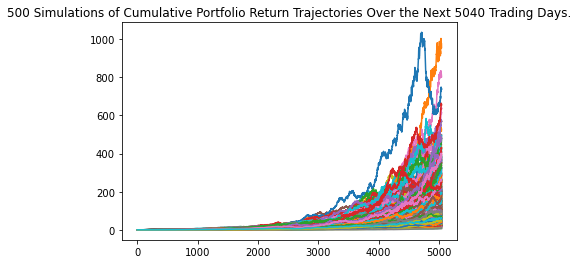

In [11]:
# Plot simulation outcomes
line_plot = MC_20_years.plot_simulation()

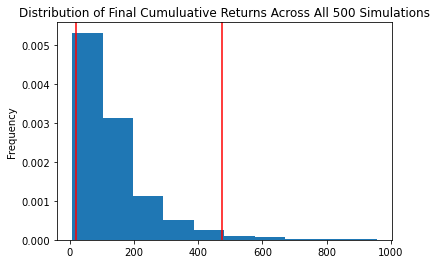

In [12]:
# Plot probability distribution and confidence intervals
dist_plot = MC_20_years.plot_distribution()

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_20_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean            136.318784
std             121.433911
min               7.838322
25%              57.267116
50%             101.355230
75%             167.755904
max             954.990419
95% CI Lower     21.308289
95% CI Upper    473.530460
Name: 5040, dtype: float64


In [15]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 20 years will end within in the range of $426165.77 and $9470609.2


In [17]:
# Set initial investment
initial_investment = 1000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*1000,2)
ci_upper = round(tbl[9]*1000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 20 years will end within in the range of $21308.29 and $473530.46
